In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Defining the url for the dataset
urlds="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/Sp22/Team1_NYC_Restaurant_Inspections.zip"

#Access to datasets via URLs is usually easy (see command below) but we have to work around a security issue in our case.
csvdata=requests.get(urlds,verify=False).content  #this will generate a warning but you can proceed

zf = ZipFile(BytesIO(csvdata),'r')  #The dataset is being accessed from a zip file so this step is needed. 
#It might take a while for all of the data to be accessed. Be patient.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
#Opening the dataset file and reading it into a data frame called "data"
data=pd.read_csv(zf.open("Team1_DOHMH_NYC_Restaurant_Inspections.csv"))

In [4]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50008319,POULETTE,Manhattan,790,9 AVENUE,10019.0,2129569488,Chicken,01/28/2019,Violations were cited in the following area(s).,...,03/24/2022,Cycle Inspection / Initial Inspection,40.765040,-73.987795,104.0,3.0,13300.0,1025235.0,1.010430e+09,MN15
1,50100420,SOHO DINER,Manhattan,320,WEST BROADWAY,10013.0,2129653091,American,01/02/2020,Violations were cited in the following area(s).,...,03/24/2022,Pre-permit (Operational) / Initial Inspection,40.721906,-74.004178,102.0,1.0,4700.0,1087764.0,1.002270e+09,MN24
2,41678734,TINY'S DINER,Bronx,3603,RIVERDALE AVENUE,10463.0,7187087600,American,09/23/2019,Violations were cited in the following area(s).,...,03/24/2022,Cycle Inspection / Initial Inspection,40.886691,-73.907056,208.0,11.0,29500.0,2084186.0,2.057960e+09,BX29
3,40795021,TAO RESTAURANT,Manhattan,42,EAST 58 STREET,10022.0,2128882288,Asian/Asian Fusion,03/11/2020,Violations were cited in the following area(s).,...,03/24/2022,Cycle Inspection / Initial Inspection,40.762786,-73.971486,105.0,4.0,11202.0,1036073.0,1.012930e+09,MN17
4,40795021,TAO RESTAURANT,Manhattan,42,EAST 58 STREET,10022.0,2128882288,Asian/Asian Fusion,03/11/2020,Violations were cited in the following area(s).,...,03/24/2022,Cycle Inspection / Initial Inspection,40.762786,-73.971486,105.0,4.0,11202.0,1036073.0,1.012930e+09,MN17


In [5]:
data.columns = [c.replace(' ', '_') for c in data.columns]

In [6]:
print(data.columns.tolist())

['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE_DESCRIPTION', 'INSPECTION_DATE', 'ACTION', 'VIOLATION_CODE', 'VIOLATION_DESCRIPTION', 'CRITICAL_FLAG', 'SCORE', 'GRADE', 'GRADE_DATE', 'RECORD_DATE', 'INSPECTION_TYPE', 'Latitude', 'Longitude', 'Community_Board', 'Council_District', 'Census_Tract', 'BIN', 'BBL', 'NTA']


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327812 entries, 0 to 327811
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  327812 non-null  int64  
 1   DBA                    326509 non-null  object 
 2   BORO                   327812 non-null  object 
 3   BUILDING               327228 non-null  object 
 4   STREET                 327799 non-null  object 
 5   ZIPCODE                322825 non-null  float64
 6   PHONE                  327784 non-null  object 
 7   CUISINE_DESCRIPTION    323843 non-null  object 
 8   INSPECTION_DATE        327812 non-null  object 
 9   ACTION                 323844 non-null  object 
 10  VIOLATION_CODE         320176 non-null  object 
 11  VIOLATION_DESCRIPTION  322139 non-null  object 
 12  CRITICAL_FLAG          327812 non-null  object 
 13  SCORE                  312629 non-null  float64
 14  GRADE                  165640 non-nu

In [12]:
bardata=data.groupby('BORO')['GRADE'].value_counts().unstack().fillna(0).astype(int)
bardata = bardata.rename_axis(columns=None)
bardata = bardata.drop(labels=['0'],axis=0)
bardata = bardata.drop(columns=['G', 'N'])
bardata # we keep only A,B,C,P,Z grade for the grade data

,A,B,C,P,Z
BORO,,,,,
Bronx,12291,2275,892,220,327
Brooklyn,31041,4569,1867,542,997
Manhattan,51478,7093,2880,655,1109
Queens,29819,4457,1973,464,907
Staten Island,4450,556,186,48,107


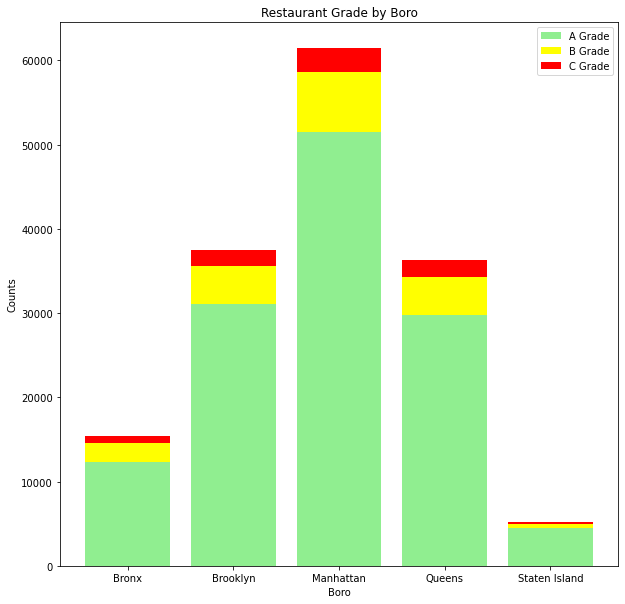

In [15]:
plt.figure(figsize=(10,10))
plt.bar(bardata.index,bardata.A,color='Lightgreen')
plt.bar(bardata.index,bardata.B,bottom=bardata.A,color='Yellow')
plt.bar(bardata.index,bardata.C,bottom=bardata.A+bardata.B,color='Red')
plt.xlabel('Boro')
plt.ylabel('Counts')
plt.title('Restaurant Grade by Boro')
plt.legend(['A Grade','B Grade','C Grade'])
plt.show()

In [25]:
mapdata = data.drop_duplicates(subset=['CAMIS']) # Only keep unique restaurant ID
mapdata = mapdata.dropna(subset=['GRADE','VIOLATION_DESCRIPTION','Latitude','Longitude','GRADE_DATE'])
bardata2=mapdata.groupby([mapdata['CUISINE_DESCRIPTION']]).size().sort_values(ascending=False)
bardata2

CUISINE_DESCRIPTION
American        3097
Chinese         1261
Coffee/Tea      1191
Pizza            886
Italian          544
                ... 
Southwestern       2
Czech              2
Fusion             2
New French         1
Creole/Cajun       1
Length: 84, dtype: int64

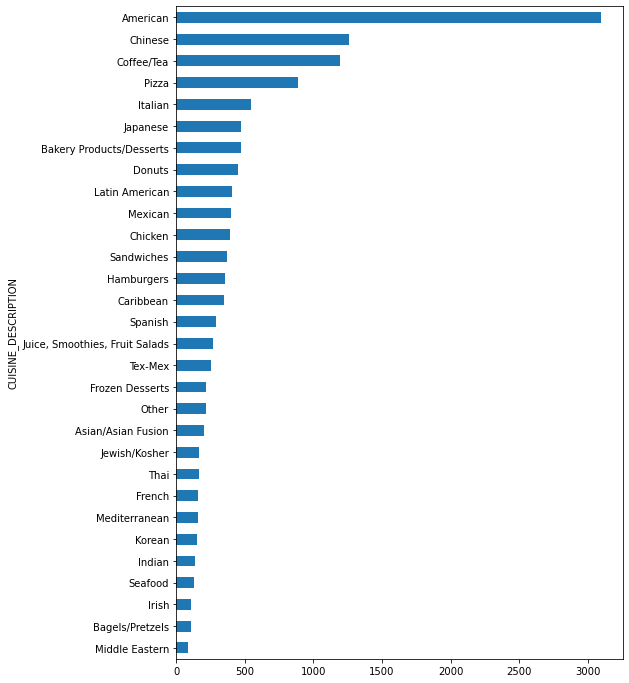

In [26]:
plt.figure(figsize=(8, 12))
bardata2[:30].sort_values(ascending=True).plot(kind='barh',legend=False)
plt.show()

In [27]:
df = data.dropna(subset=['INSPECTION_DATE'])
df['DateTime'] = pd.to_datetime(data['INSPECTION_DATE']) + pd.DateOffset(hours=0, minutes=0)
df[:1]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,ACTION,...,INSPECTION_TYPE,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL,NTA,DateTime
0,50008319,POULETTE,Manhattan,790,9 AVENUE,10019.0,2129569488,Chicken,01/28/2019,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.76504,-73.987795,104.0,3.0,13300.0,1025235.0,1.010430e+09,MN15,2019-01-28


In [28]:
df.index = pd.DatetimeIndex(df.DateTime)

In [29]:
df1 = df.drop((df.loc[df["DateTime"]=='1900-01-01']).index)
df1[:2] # remove wrong dates

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,ACTION,...,INSPECTION_TYPE,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL,NTA,DateTime
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-28,50008319,POULETTE,Manhattan,790,9 AVENUE,10019.0,2129569488,Chicken,01/28/2019,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.765040,-73.987795,104.0,3.0,13300.0,1025235.0,1.010430e+09,MN15,2019-01-28
2020-01-02,50100420,SOHO DINER,Manhattan,320,WEST BROADWAY,10013.0,2129653091,American,01/02/2020,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.721906,-74.004178,102.0,1.0,4700.0,1087764.0,1.002270e+09,MN24,2020-01-02


(0.0, 1000.0)

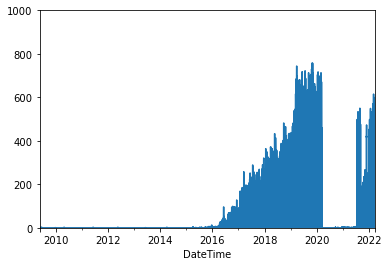

In [30]:
df1.resample('D').size().plot(legend=False)
plt.ylim([0, 1000]) #daily inspection count

(0.0, 3500.0)

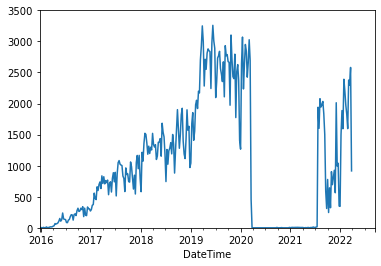

In [31]:
df.resample('W').size().plot(legend=False)
plt.xlim([2400, 2750])
plt.ylim([0, 3500]) #weekly inspection count

In [32]:
conditions = [
             df1['ACTION'] == 'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.',
             df1['ACTION'] == 'Establishment re-closed by DOHMH.',
             df1['ACTION'] == 'Establishment re-opened by DOHMH.',
             df1['ACTION'] == 'No violations were recorded at the time of this inspection.',
             df1['ACTION'] == 'Violations were cited in the following area(s).' 
             ]
feedbacks = ['Critical_Violation', 'Establishment_Re-closed', 'Establishment_Re-opened', 'No_Violation', 'Common_Violation']
df1['ACTION_FEEDBACK'] = np.select(conditions, feedbacks)

/tmp/ipykernel_54/2708146150.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ACTION_FEEDBACK'] = np.select(conditions, feedbacks)


In [33]:
#df1

(0.0, 800.0)

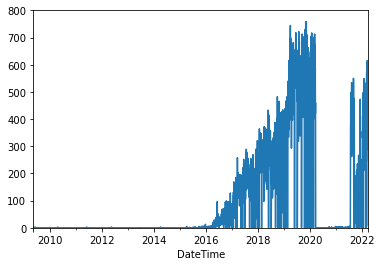

In [34]:
df1.resample('B').size().plot(legend=False)
plt.plot()
plt.ylim([0, 800]) #business day

In [37]:
start_date = '2016-01-01'
df_after_2016 = df1.loc[df1['DateTime']>start_date]
df_after_2016[:3]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,ACTION,...,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL,NTA,DateTime,ACTION_FEEDBACK
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-28,50008319,POULETTE,Manhattan,790,9 AVENUE,10019.0,2129569488,Chicken,01/28/2019,Violations were cited in the following area(s).,...,40.765040,-73.987795,104.0,3.0,13300.0,1025235.0,1.010430e+09,MN15,2019-01-28,Common_Violation
2020-01-02,50100420,SOHO DINER,Manhattan,320,WEST BROADWAY,10013.0,2129653091,American,01/02/2020,Violations were cited in the following area(s).,...,40.721906,-74.004178,102.0,1.0,4700.0,1087764.0,1.002270e+09,MN24,2020-01-02,Common_Violation
2019-09-23,41678734,TINY'S DINER,Bronx,3603,RIVERDALE AVENUE,10463.0,7187087600,American,09/23/2019,Violations were cited in the following area(s).,...,40.886691,-73.907056,208.0,11.0,29500.0,2084186.0,2.057960e+09,BX29,2019-09-23,Common_Violation


(0.0, 1000.0)

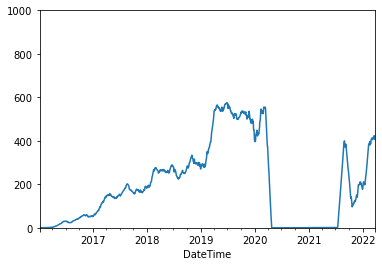

In [38]:
df_after_2016.resample('B').size().rolling(30,min_periods=1).mean().plot(legend=False)
plt.plot()
plt.ylim([0, 1000]) # smooth the noises

In [39]:
#df_vio_III = df_after_2015[df_after_2015['df_after_2015'] == 'Type_III_Violation']
df_vio_type = pd.crosstab(df_after_2016.DateTime, df_after_2016.ACTION_FEEDBACK)
df_vio_type['Total'] = df_vio_type['Common_Violation']+df_vio_type['Critical_Violation']+df_vio_type['Establishment_Re-closed']+df_vio_type['Establishment_Re-opened']+df_vio_type['No_Violation']
df_vio_type['Critical_Violation_Rate']=(df_vio_type['Critical_Violation']+df_vio_type['Establishment_Re-closed'])/df_vio_type['Total']

In [41]:
df_vio_type.head()

ACTION_FEEDBACK,Common_Violation,Critical_Violation,Establishment_Re-closed,Establishment_Re-opened,No_Violation,Total,Critical_Violation_Rate
DateTime,,,,,,,
2016-01-07,3,0,0,0,0,3,0.0
2016-01-19,2,0,0,0,0,2,0.0
2016-01-21,5,0,0,0,0,5,0.0
2016-01-30,0,0,0,0,1,1,0.0
2016-02-05,1,0,0,0,0,1,0.0


(0.0, 800.0)

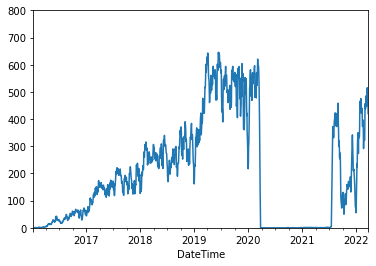

In [42]:
df_after_2016.resample('B').size().rolling(7).mean().plot()
plt.ylim(0,800)

<AxesSubplot:title={'center':'Establishmen Condition'}, xlabel='DateTime'>

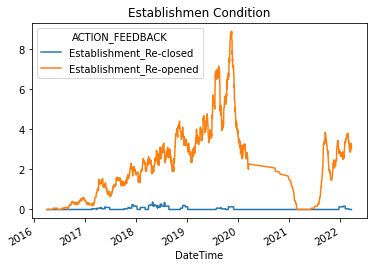

In [43]:
df_vio_type[['Establishment_Re-closed','Establishment_Re-opened']].rolling(30).mean().plot(title = 'Establishmen Condition')

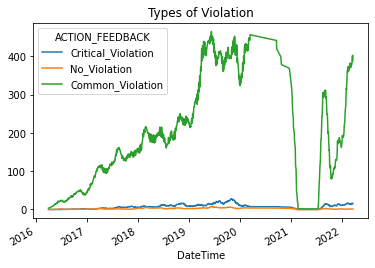

In [44]:
df_vio_type[['Critical_Violation', 'No_Violation', 'Common_Violation']].rolling(30).mean().plot(title = 'Types of Violation')
plt.show()

In [45]:
df_filtered = df_vio_type[df_vio_type['Total'] >= 30] #don't count rates if the inspection count is lower than 30

In [46]:
df_filtered = df_filtered.reset_index()

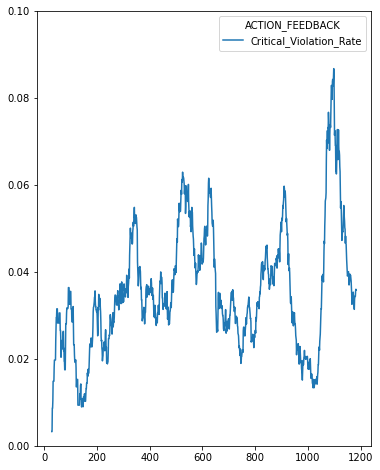

In [47]:
df_filtered[['Critical_Violation_Rate']].rolling(30).mean().plot(figsize=(6,8))
plt.ylim(0,0.1)
plt.show()